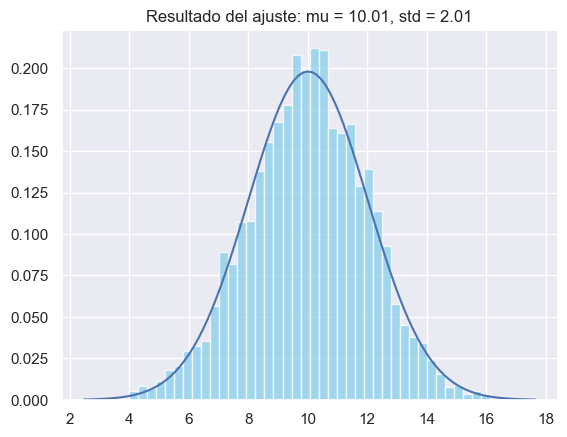

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

np.random.seed(1903)

data = np.random.normal(10, 2, 5000)

mu, std = st.norm.fit(data)

x = np.linspace(data.min(), data.max(), 100)
y = st.norm.pdf(x, mu, std)
plt.plot(x, y)
plt.title("Resultado del ajuste: mu = %.2f, std = %.2f" % (mu, std))
plt.hist(data, bins=50, density=True, alpha=0.75, color='skyblue')
#plt.savefig('Figure_1.png')
plt.show()

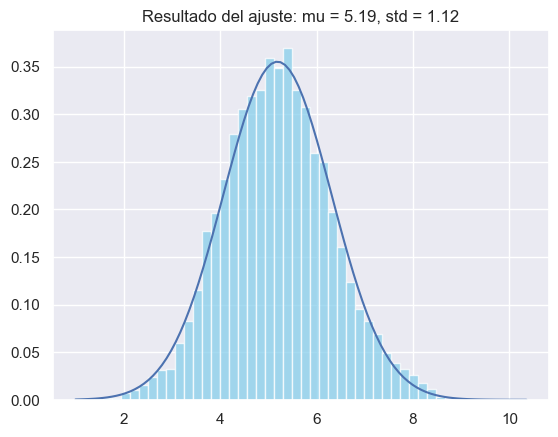

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

data = pd.read_feather('california_housing_clean.ftr', columns=['AveRooms'])

mu, std = st.norm.fit(data)

x = np.linspace(data.min(), data.max(), 100)
y = st.norm.pdf(x, mu, std)
plt.plot(x, y)
plt.title("Resultado del ajuste: mu = %.2f, std = %.2f" % (mu, std))
plt.hist(data, bins=50, density=True, alpha=0.75, color='skyblue')
#plt.savefig('Figure_2.png')
plt.show()

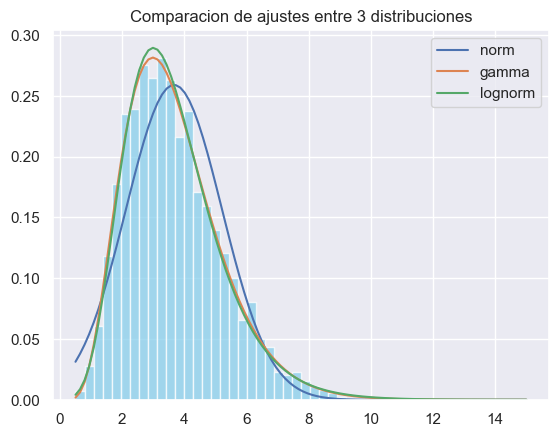

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

data = pd.read_feather('california_housing_clean.ftr', columns=['MedInc'])

x = np.linspace(data.min(), data.max(), 100)

distrs = ['norm', 'gamma', 'lognorm']
for i in distrs:
    dist = getattr(st, i)
    param = dist.fit(data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(x, pdf_fitted, label=i)

plt.hist(data, bins=50, density=True, alpha=0.75, color='skyblue')
plt.legend()
plt.title('Comparacion de ajustes entre 3 distribuciones')
#plt.savefig('Figure_3.png')
plt.show()